In [19]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import vlc
from tqdm import tqdm

In [20]:
train = pd.read_csv('data/en/train.tsv', sep='\t')
train = train[['client_id', 'path', 'age', 'gender', 'sentence']].dropna()
train = train[train['gender'] != 'other']

In [24]:
train[train.age=='eighties'].gender.value_counts()

male      392
female     42
Name: gender, dtype: int64

In [4]:
print(train.shape[0]/train['client_id'].nunique())
print()

46.87558139534884



In [5]:
train.columns

Index(['client_id', 'path', 'age', 'gender', 'sentence'], dtype='object')

In [29]:
train = pd.read_csv('data_info.csv')

In [6]:
from modules.DataPreprocessor import DataLoader
dl = DataLoader()
audio = np.array(dl.load_audio_binary(500))
spec = dl.make_spectrogram(500)

In [15]:
def show_and_play(case_num, train=train):
    from modules.DataPreprocessor import DataLoader
    dl = DataLoader()
    audio = np.array(dl.load_audio_binary(case_num))
    spec = dl.make_spectrogram(case_num)
    path = dl.get_path(case_num)
    fig, ax = plt.subplots(figsize=(16, 5))
    ax.imshow(spec[~np.all(spec==np.min(spec), axis=1)]
        , cmap='plasma', interpolation='nearest', aspect='auto')
    print('Recording:\t', case_num, '/', train.shape[0]-1)
    print('Client ID:\t', train['client_id'].iloc[case_num])
    print('Sentence:\t', train['sentence'].iloc[case_num])
    print('Age:\t\t', train['age'].iloc[case_num])
    print('Gender:\t\t', train['gender'].iloc[case_num])

    p = vlc.MediaPlayer(path)
    p.play()

Recording:	 36302 / 38781
Client ID:	 ab72e9ab22713aec03a3189202a0713e56016ea07569b3041fcd65d77c9eb3f8c692f7ccaec75c16bbc62476d528f434d829193994cf07fcde9e3b1e4a2fa93a
Sentence:	 The Brady family maintained enough stock, however, to maintain control of the company.
Age:		 sixties
Gender:		 male


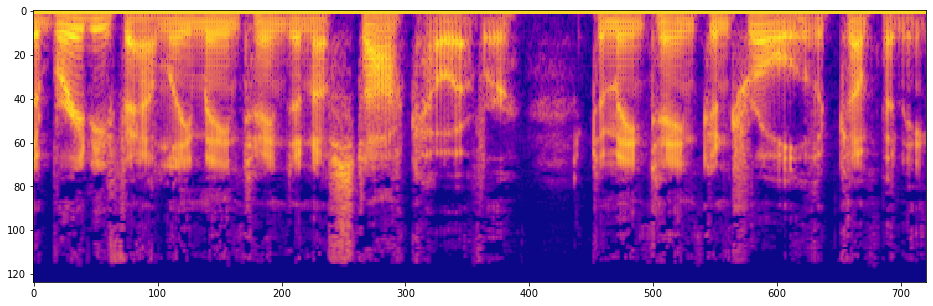

In [18]:
show_and_play(36302, train)

In [82]:
(train['age'].value_counts()/(train['age'].shape[0]+1))*100

twenties     37.374304
thirties     19.623882
fourties     16.929040
sixties      10.913939
fifties       7.173222
teens         6.681757
seventies     1.152540
eighties      0.134572
nineties      0.016434
Name: age, dtype: float64

In [83]:
train['age'].map({'teens':0, 'twenties':1, 'seventies':2, 'fifties':3, 'fourties':4,
       'thirties':5, 'sixties':6, 'eighties':7, 'nineties':8}).unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [84]:
train['gender'].map({'male':0, 'female':1}).unique()

array([0, 1])

In [56]:
test_data_idx = []
for gender_name in train.gender.unique():
    for age_name in train.age.unique():
        test_data_idx.append(train[(train.gender == gender_name) & (train.age == age_name)].sample(6).index.values)
test_data_idx = np.array(test_data_idx).ravel()

array([35214, 11507, 37781, 15161, 11047, 16571, 11436, 27826, 22271,
       37696, 19275, 23918, 37642, 31505, 38153,  5068, 22661, 27927,
       11197,  5222, 17923,  9262, 22639, 36669,  9004, 37808,  8919,
       21036,  4638,  8237, 21442, 14505, 20208, 33464,   457, 34401,
       27035,  8053, 37602, 10274, 33054, 32332, 17111,  6619, 27153,
       35030,  5541, 10690,  6342, 33463, 34968, 28515, 30141,  6910,
       25044, 38104,  9584,  1647, 14812, 36698, 30993, 18563,  4177,
       37552, 20777, 10376, 20090, 33931, 11627,  3334, 24532, 24002,
       23985,  6536, 19682,  6706,  8324, 33276,  9713, 30028,  7679,
       38073, 14384, 26848, 29750, 10973, 20582, 33585,  2263, 24295,
       34796, 12905, 24935, 26235, 37654, 19222])

In [67]:
train.iloc[np.load('test_data_idx.npy'),:]

,client_id,path,age,gender,sentence,length,length_cut
35214,7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...,common_voice_en_19189902.mp3,sixties,female,Britain retains certain overseas territories.,258048,152640
11507,7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...,common_voice_en_18897740.mp3,sixties,female,He and his wife opened their home to many of t...,300672,206400
37781,e6dbbe39377aa0fe2851852b2c695c9c31094c80c9ccd2...,common_voice_en_19842391.mp3,sixties,female,The mathematics would be much more complicated.,264960,167040
15161,7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...,common_voice_en_20801061.mp3,sixties,female,Slowworms are protected in the United Kingdom ...,262656,169920
11047,7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...,common_voice_en_20757427.mp3,sixties,female,Sarhan remains active in fundraising and other...,347904,252480
...,...,...,...,...,...,...,...
12905,4591d904283256d081da48158dc1c57be862e4d6b3f306...,common_voice_en_18758387.mp3,eighties,male,Thaddeus Leavitt Esq.,177408,88320
24935,4591d904283256d081da48158dc1c57be862e4d6b3f306...,common_voice_en_18758376.mp3,eighties,male,Concannon is owned by The Wine Group.,230400,139200
26235,4591d904283256d081da48158dc1c57be862e4d6b3f306...,common_voice_en_18982875.mp3,eighties,male,Pius instructed bishops to impose penalties on...,331776,223680
37654,4591d904283256d081da48158dc1c57be862e4d6b3f306...,common_voice_en_18753204.mp3,eighties,male,"In Karnad's play ""Yayati"", Nag played the role...",428544,289920


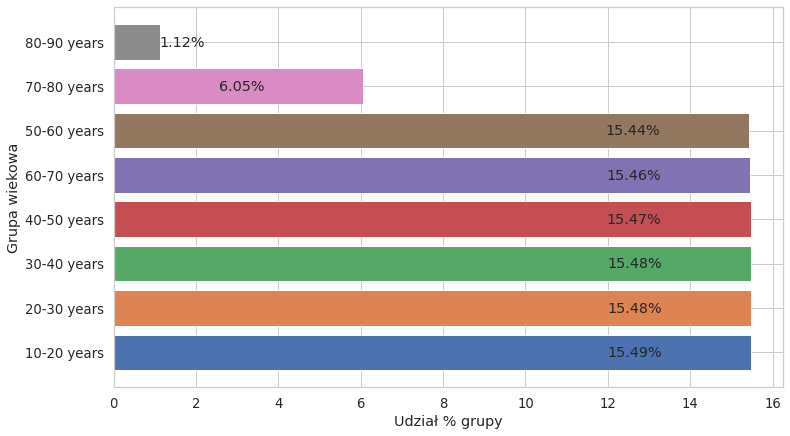

In [35]:
import seaborn as sns
sns.set(font_scale=1.2, style='whitegrid')
colors = sns.color_palette()

labels = ['10-20 years', '20-30 years', '30-40 years', '40-50 years', '60-70 years', '50-60 years', '70-80 years', '80-90 years']
values = (train['age'].value_counts()/(train['age'].shape[0]+1))*100

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(
    labels,
    values,
    color=(colors[0], colors[1], colors[2], colors[3], colors[4], colors[5], colors[6], colors[7], colors[8])
    )
ax.set(xlabel='Udział % grupy', ylabel='Grupa wiekowa')
# ax.set(title='Dystrybucja wieku w zbiorze treningowym')
for index, value in enumerate(values):
    if value>5:
        ax.text(value-3.5, index-0.1, str(np.round(value, 2))+'%')
    else:
        ax.text(value, index-0.1, str(np.round(value, 2))+'%')
fig.savefig(os.path.join('figures', 'distribution_age_before.pdf'), bbox_inches='tight')

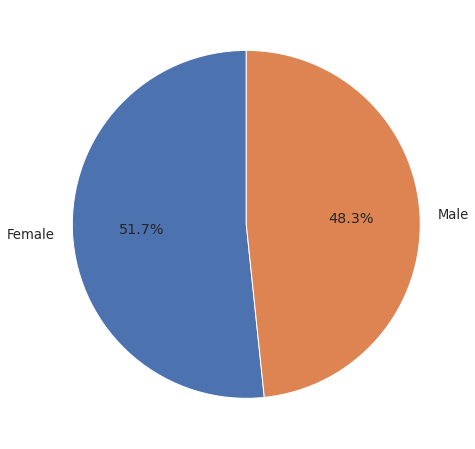

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.pie(train['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.show()
fig.savefig(os.path.join('figures', 'distribution_gender_before.pdf'), bbox_inches='tight')

## MAKING DATA SMALLER 

In [87]:
ages_counts = train['age'].value_counts()
ages_counts

twenties     120534
thirties      63288
fourties      54597
sixties       35198
fifties       23134
teens         21549
seventies      3717
eighties        434
nineties         53
Name: age, dtype: int64

In [88]:
gender_counts = train['gender'].value_counts()
gender_counts

male      242541
female     79963
Name: gender, dtype: int64

### Make distribution between teens and seventies even for both men and women

In [89]:
data_cut_1 = pd.read_csv('data_info.csv')

In [90]:
# data_cut_1 = pd.concat(
#     (train[(train['gender']=='male') & (~train['age'].isin(['eighties', 'nineties']))].sample(gender_counts['female']),
#      train[(train['gender']=='female') & (~train['age'].isin(['eighties', 'nineties']))],
#      train[(train['age'].isin(['eighties', 'nineties']))])                     )

In [91]:
ages_counts = data_cut_1['age'].value_counts()
ages_counts

teens        5998
thirties     5997
twenties     5997
fifties      5993
sixties      5989
fourties     5979
seventies    2344
eighties      433
nineties       52
Name: age, dtype: int64

In [92]:
# data_cut_2 = pd.DataFrame()
# sample_size = 6000
# for age in data_cut_1['age'].unique():
#     try:
#         data_cut_2 = pd.concat(
#         (data_cut_2, data_cut_1[data_cut_1['age']==age].sample(sample_size))
#         )
#     except:
#         print('sample size', sample_size, 'bigger than population for age:', age, '[Using all data]')
#         data_cut_2 = pd.concat(
#         (data_cut_2, data_cut_1[data_cut_1['age']==age].sample(ages_counts[age]))
#         )

In [93]:
train = pd.read_csv('data_info.csv')

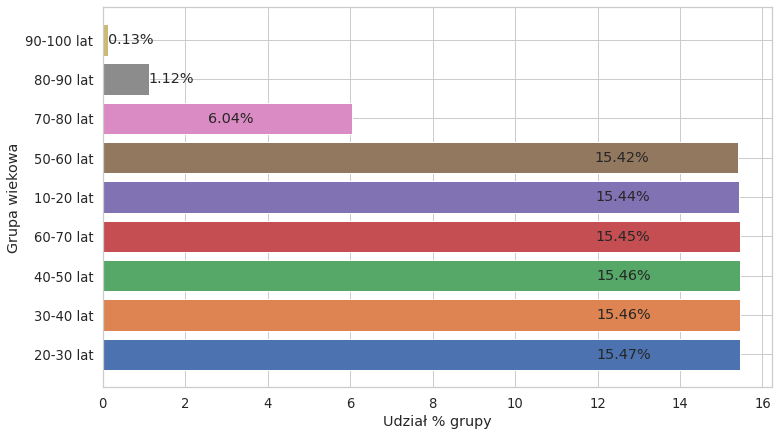

In [94]:
import seaborn as sns
sns.set(font_scale=1.2, style='whitegrid')
colors = sns.color_palette()

labels = ['20-30 lat', '30-40 lat', '40-50 lat', '60-70 lat', '10-20 lat', '50-60 lat', '70-80 lat', '80-90 lat', '90-100 lat']
values = (train['age'].value_counts()/(train['age'].shape[0]+1))*100

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(
    labels,
    values,
    color=(colors[0], colors[1], colors[2], colors[3], colors[4], colors[5], colors[6], colors[7], colors[8])
    )
ax.set(xlabel='Udział % grupy', ylabel='Grupa wiekowa')
# ax.set(title='Dystrybucja wieku w zbiorze treningowym')
for index, value in enumerate(values):
    if value>5:
        ax.text(value-3.5, index-0.1, str(np.round(value, 2))+'%')
    else:
        ax.text(value, index-0.1, str(np.round(value, 2))+'%')
fig.savefig(os.path.join('figures', 'distribution_age.pdf'), bbox_inches='tight')

In [40]:
pd.read_csv('data_info.csv')

,Unnamed: 0,client_id,path,age,gender,sentence,length
0,0,7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...,common_voice_en_19956141.mp3,sixties,female,He had success right off the bat with Do You B...,266112
1,1,3dbc57adea9742c6782b7c88b7ac313e4bb7e26374db2e...,common_voice_en_20012566.mp3,fourties,female,"While the Doctor aids Clent, Penley leaves the...",252288
2,2,5b1dd93d15c860f4d94c18ca33bb896b1b4a4f2f95f253...,common_voice_en_18343993.mp3,teens,male,The hyena proceeded to dine.,161280
3,3,70c21ca1cc3de05f3c23b11615cd7d5dd078e03cda0cd4...,common_voice_en_20791392.mp3,fifties,female,"In Manchuria and Siberia, they mate during Jan...",271872
4,4,db94fba2e15010f1a4aa114d910ac1e1a320c5dbd692a3...,common_voice_en_20005534.mp3,fourties,male,The reconfigured centre would have been brande...,205056
...,...,...,...,...,...,...,...
38777,38831,4ba8b91d601ee7f27be3011552ea94c8d076d9816d4a77...,common_voice_en_19769331.mp3,seventies,female,The first volume was written during Ovid's jou...,288000
38778,38832,afcc38200b25a04019f5e3125535f1d93674ad6f0be9ac...,common_voice_en_193416.mp3,sixties,female,Play Lil Hardin Armstrong from Itunes.,253440
38779,38833,e140a69135f35bc81e98140a267e18a382807d684099be...,common_voice_en_21169446.mp3,twenties,male,It is primarily a farming community.,196992
38780,38834,64bb74229c8a05aeeebe8aeb498d5a0389479625a0085d...,common_voice_en_19761030.mp3,twenties,male,The Ewings had thirteen children.,171648


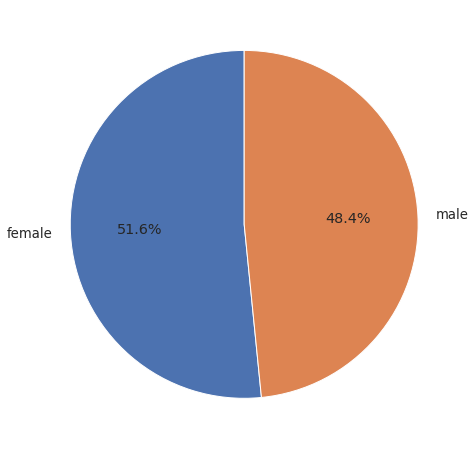

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(train['gender'].value_counts(), labels=train['gender'].value_counts().index, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.show()
fig.savefig(os.path.join('figures', 'distribution_gender.pdf'), bbox_inches='tight')

In [96]:
# train_og = pd.read_csv('data/en/train.tsv', sep='\t')
# train_og = train_og[['client_id', 'path', 'age', 'gender', 'sentence']].dropna()
# train_og = train_og[train_og['gender'] != 'other']


# lengths = []
# for case_num in tqdm(train.index.values):
#     path = str('data/en/clips/' + train_og['path'].loc[case_num])
#     audio_binary = tf.io.read_file(path)
#     audio = tfio.audio.decode_mp3(audio_binary)
#     lengths.append(len(audio))
# train['length'] = lengths
# train = train.sample(frac=1).reset_index(drop=True)
# train = train[train['length']<500000]
# train.to_csv('data_info.csv')

In [97]:
train

,Unnamed: 0,client_id,path,age,gender,sentence,length
0,0,7eff9a54bdb0619deffda7609d5b8565278e3328de99e6...,common_voice_en_19956141.mp3,sixties,female,He had success right off the bat with Do You B...,266112
1,1,3dbc57adea9742c6782b7c88b7ac313e4bb7e26374db2e...,common_voice_en_20012566.mp3,fourties,female,"While the Doctor aids Clent, Penley leaves the...",252288
2,2,5b1dd93d15c860f4d94c18ca33bb896b1b4a4f2f95f253...,common_voice_en_18343993.mp3,teens,male,The hyena proceeded to dine.,161280
3,3,70c21ca1cc3de05f3c23b11615cd7d5dd078e03cda0cd4...,common_voice_en_20791392.mp3,fifties,female,"In Manchuria and Siberia, they mate during Jan...",271872
4,4,db94fba2e15010f1a4aa114d910ac1e1a320c5dbd692a3...,common_voice_en_20005534.mp3,fourties,male,The reconfigured centre would have been brande...,205056
...,...,...,...,...,...,...,...
38777,38831,4ba8b91d601ee7f27be3011552ea94c8d076d9816d4a77...,common_voice_en_19769331.mp3,seventies,female,The first volume was written during Ovid's jou...,288000
38778,38832,afcc38200b25a04019f5e3125535f1d93674ad6f0be9ac...,common_voice_en_193416.mp3,sixties,female,Play Lil Hardin Armstrong from Itunes.,253440
38779,38833,e140a69135f35bc81e98140a267e18a382807d684099be...,common_voice_en_21169446.mp3,twenties,male,It is primarily a farming community.,196992
38780,38834,64bb74229c8a05aeeebe8aeb498d5a0389479625a0085d...,common_voice_en_19761030.mp3,twenties,male,The Ewings had thirteen children.,171648


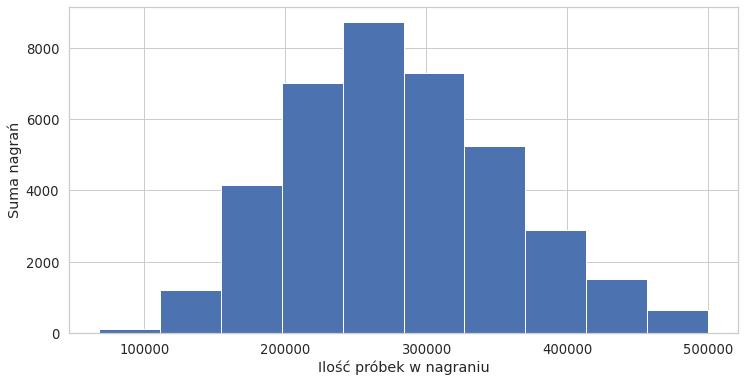

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(train['length']);
ax.set(xlabel='Ilość próbek w nagraniu', ylabel='Suma nagrań')
fig.savefig(os.path.join('figures', 'histogram.pdf'))

In [99]:
train.

SyntaxError: invalid syntax (<ipython-input-99-4ad677fcc250>, line 1)